In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

In [3]:
df1 = pd.read_csv('ds_salaries.csv')

In [4]:
df1.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
df1.columns


Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [6]:
df2 = df1.drop(columns=['Unnamed: 0'],axis='columns')

In [7]:
df2.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [8]:
df2.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


## Dataset columns description

work_year - The year the salary was paid.

experience_level : The experience level in the job during the year with the following possible values: EN = Entry-level / Junior MI = Mid-level / Intermediate SE = Senior-level / Expert EX = Executive-level / Director

employment_type - The type of employement for the role: PT = Part-time FT = Full-time CT = Contract FL = Freelance

job_title - The role worked in during the year.

salary - The total gross salary amount paid.

salary_currency - The currency of the salary paid as an ISO 4217 currency code.

salary_in_usd - The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

employee_residence - Employee's primary country of residence in during the work year as an ISO 3166 country code(Alpha-2 code).

remote_ratio - The overall amount of work done remotely, possible values are as follows: 0 = No remote work (less than 20%) 50 = Partially remote 100 = Fully remote (more than 80%)

company_location - The country of the employer's main office or contracting branch as an ISO 3166 country code(Alpha-2 code).

company_size - The average number of people that worked for the company during the year: S = less than 50 employees (small) M = 50 to 250 employees (medium) L = more than 250 employees (large)





In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [10]:
df2.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [11]:
df2.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


## Data Preprocessing

In [12]:
df2.shape

(607, 11)

In [13]:
df2.duplicated().sum()

42

In [14]:
df2.drop_duplicates(inplace=True)

In [15]:
df2.shape

(565, 11)

In [16]:
df2['experience_level'].value_counts()

SE    243
MI    208
EN     88
EX     26
Name: experience_level, dtype: int64

In [17]:
df2['experience_level'] = df2['experience_level'].map({
                            'SE': 'Senior',
                            'MI': 'Mid',
                            'EN': 'Entry',
                            'EX': 'Executive'
                        })

In [18]:
df2['experience_level'].value_counts()

Senior       243
Mid          208
Entry         88
Executive     26
Name: experience_level, dtype: int64

In [19]:
df2['employment_type'].value_counts()

FT    546
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

In [20]:
df2['employment_type'] = df2['employment_type'].map({
                            'FT': 'Full_Time',
                            'PT': 'Part_Time',
                            'CT': 'Contract',
                            'FL': 'Freelance'
                        })

In [21]:
df2['employment_type'].value_counts()

Full_Time    546
Part_Time     10
Contract       5
Freelance      4
Name: employment_type, dtype: int64

In [22]:
df2.drop(['salary','salary_currency'],axis='columns',inplace=True)

In [23]:
df2.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid,Full_Time,Data Scientist,79833,DE,0,DE,L
1,2020,Senior,Full_Time,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,Senior,Full_Time,Big Data Engineer,109024,GB,50,GB,M
3,2020,Mid,Full_Time,Product Data Analyst,20000,HN,0,HN,S
4,2020,Senior,Full_Time,Machine Learning Engineer,150000,US,50,US,L


In [24]:
df2.shape

(565, 9)

In [25]:
df2['employee_residence'].unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'PL',
       'PT', 'CN', 'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'PH', 'ES',
       'DK', 'RU', 'IT', 'HR', 'BG', 'SG', 'BR', 'IQ', 'VN', 'BE', 'UA',
       'MT', 'CL', 'RO', 'IR', 'CO', 'MD', 'KE', 'SI', 'HK', 'TR', 'RS',
       'PR', 'LU', 'JE', 'CZ', 'AR', 'DZ', 'TN', 'MY', 'EE', 'AU', 'BO',
       'IE', 'CH'], dtype=object)

In [26]:
#converting countries code to its corresponding names for 'employee_residence' and 'company_location'
import pycountry

def convert_country_code_to_name(code):
    try:
        # Look up the country object using the code
        country = pycountry.countries.lookup(code)
        # Return the country name
        return country.name
    except:
        # Return the original code if the lookup fails
        return code

In [27]:
df2['employee_residence'] = df2['employee_residence'].apply(convert_country_code_to_name)
df2['company_location'] = df2['company_location'].apply(convert_country_code_to_name)

In [28]:
df2.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid,Full_Time,Data Scientist,79833,Germany,0,Germany,L
1,2020,Senior,Full_Time,Machine Learning Scientist,260000,Japan,0,Japan,S
2,2020,Senior,Full_Time,Big Data Engineer,109024,United Kingdom,50,United Kingdom,M
3,2020,Mid,Full_Time,Product Data Analyst,20000,Honduras,0,Honduras,S
4,2020,Senior,Full_Time,Machine Learning Engineer,150000,United States,50,United States,L


In [29]:
df2['employee_residence'].value_counts()

United States                      295
United Kingdom                      43
India                               30
Canada                              27
Germany                             24
France                              18
Spain                               15
Greece                              12
Japan                                7
Portugal                             6
Brazil                               6
Pakistan                             6
Netherlands                          5
Poland                               4
Italy                                4
Russian Federation                   4
United Arab Emirates                 3
Austria                              3
Viet Nam                             3
Turkey                               3
Australia                            3
Romania                              2
Belgium                              2
Singapore                            2
Slovenia                             2
Denmark                  

In [30]:
df2['company_location'].value_counts()

United States                318
United Kingdom                46
Canada                        28
Germany                       27
India                         24
France                        15
Spain                         14
Greece                        10
Japan                          6
Netherlands                    4
Austria                        4
Portugal                       4
Poland                         4
Luxembourg                     3
Pakistan                       3
Brazil                         3
United Arab Emirates           3
Mexico                         3
Australia                      3
Turkey                         3
Denmark                        3
Italy                          2
Czechia                        2
Slovenia                       2
Russian Federation             2
Switzerland                    2
Nigeria                        2
China                          2
Belgium                        2
Viet Nam                       1
Estonia   

In [31]:
df2['company_size'].value_counts()

M    290
L    193
S     82
Name: company_size, dtype: int64

In [32]:
df2['company_size'] = df2['company_size'].map({
                        'M': 'Medium',
                        'L': 'Large',
                        'S': 'Small'
                    })

In [33]:
df2['company_size'].value_counts()

Medium    290
Large     193
Small      82
Name: company_size, dtype: int64

In [34]:
df2['remote_ratio'].value_counts()

100    346
0      121
50      98
Name: remote_ratio, dtype: int64

In [35]:
df2.rename(columns={'remote_ratio': 'job_type'},inplace=True)

In [36]:
df2['job_type'] = df2['job_type'].map({
                    100: 'remote',
                    0: 'onsite',
                    50: 'hybrid'
                    
                  })

In [37]:
df2['job_type'].value_counts()

remote    346
onsite    121
hybrid     98
Name: job_type, dtype: int64

In [38]:
df2['job_title'].value_counts()

Data Scientist                              130
Data Engineer                               121
Data Analyst                                 82
Machine Learning Engineer                    39
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [39]:
df2.to_csv('processed_data.csv',index=False)

## Exploratory Data Analysis

<AxesSubplot:xlabel='work_year', ylabel='count'>

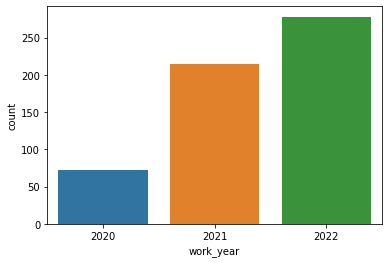

In [40]:
sns.countplot(x="work_year", data=df2)

<AxesSubplot:xlabel='experience_level', ylabel='count'>

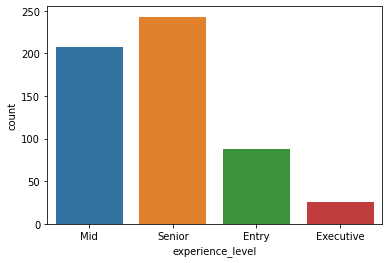

In [41]:
sns.countplot(x='experience_level',data=df2)

<AxesSubplot:xlabel='employment_type', ylabel='count'>

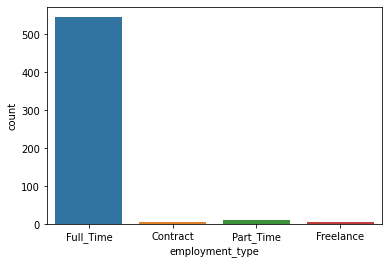

In [42]:
sns.countplot(x='employment_type',data=df2)

<AxesSubplot:xlabel='employment_type', ylabel='count'>

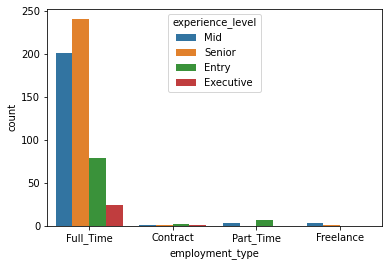

In [43]:
 sns.countplot(data=df2, x='employment_type', hue='experience_level')

<AxesSubplot:xlabel='job_title', ylabel='count'>

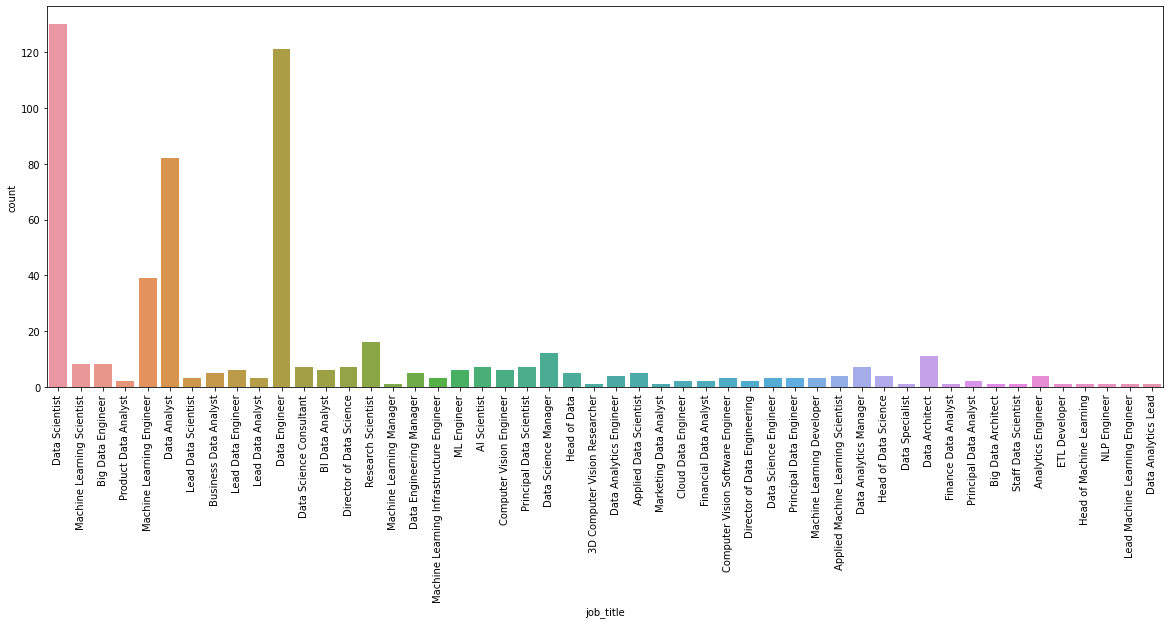

In [44]:
plt.figure(figsize=(20,7))
plt.xticks(rotation="vertical")
sns.countplot(x='job_title',data=df2)


C:\Users\suyog\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary_in_usd', ylabel='Density'>

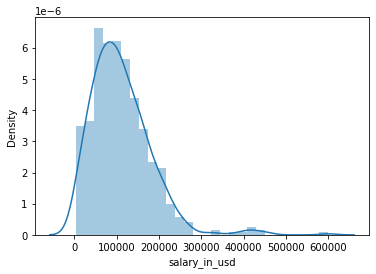

In [45]:
sns.distplot(df2['salary_in_usd'])

<AxesSubplot:xlabel='experience_level', ylabel='salary_in_usd'>

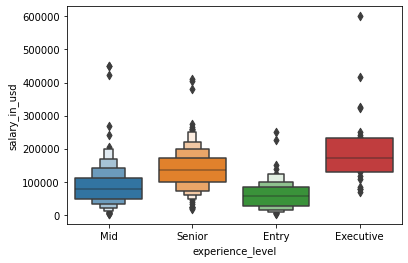

In [46]:
sns.boxenplot(x="experience_level",y="salary_in_usd",data=df2)

<AxesSubplot:xlabel='employment_type', ylabel='salary_in_usd'>

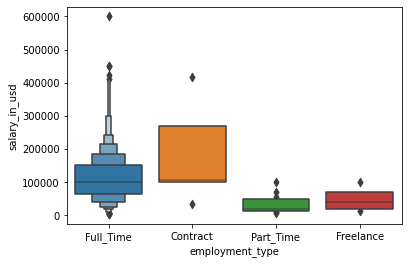

In [47]:
sns.boxenplot(x="employment_type",y="salary_in_usd",data=df2)

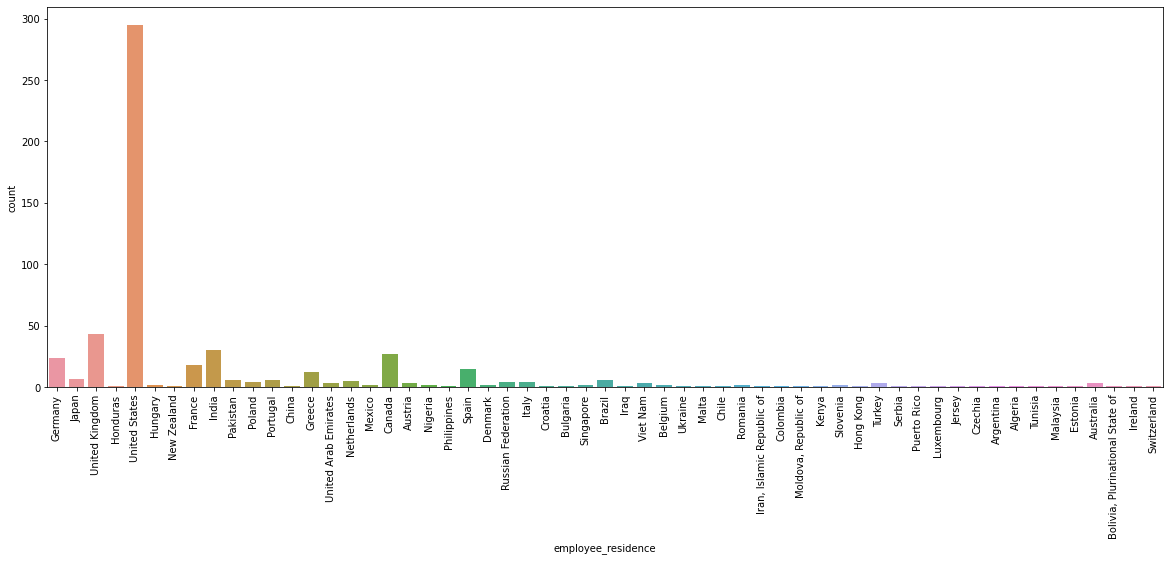

In [48]:
plt.figure(figsize=(20,7))
plt.xticks(rotation="vertical")
sns.countplot(x='employee_residence',data=df2)
plt.show()

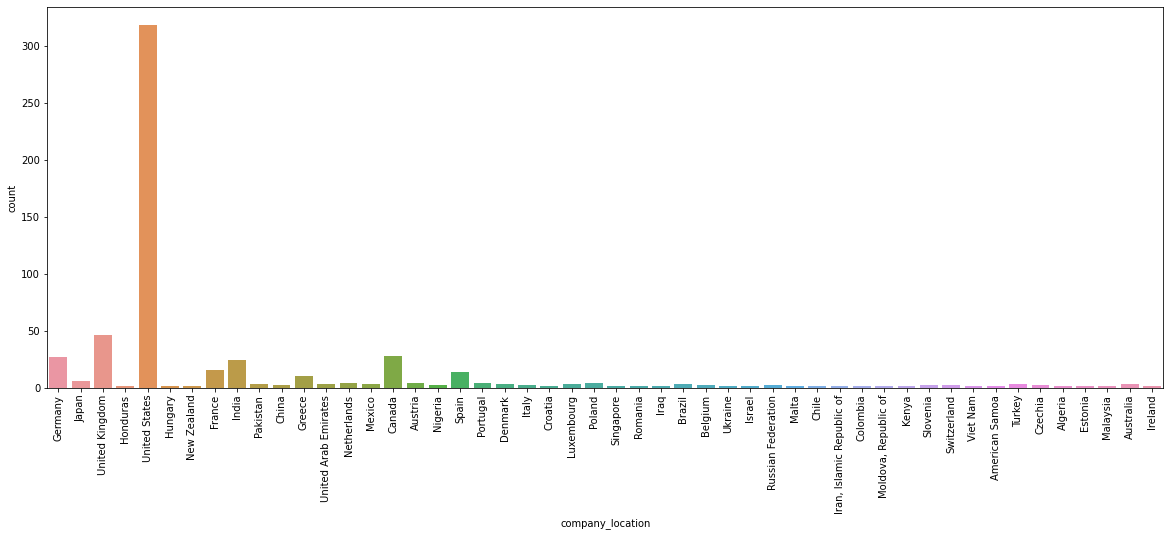

In [49]:
plt.figure(figsize=(20,7))
plt.xticks(rotation="vertical")
sns.countplot(x='company_location',data=df2)
plt.show()

<AxesSubplot:xlabel='company_size', ylabel='count'>

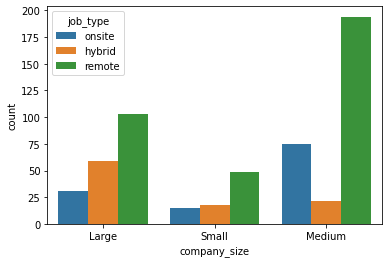

In [50]:
sns.countplot(hue='job_type',x='company_size',data=df2)

In [51]:
top_10_jobs = df2.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending = False)[:10]

In [52]:
top_10_jobs

job_title
Data Analytics Lead         405000.000000
Principal Data Engineer     328333.333333
Financial Data Analyst      275000.000000
Principal Data Scientist    215242.428571
Director of Data Science    195074.000000
Data Architect              177873.909091
Applied Data Scientist      175655.000000
Analytics Engineer          175000.000000
Data Specialist             165000.000000
Head of Data                160162.600000
Name: salary_in_usd, dtype: float64

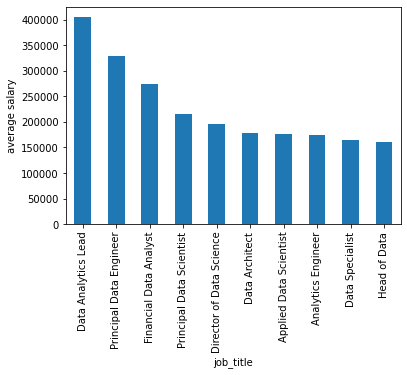

In [53]:
top_10_jobs.plot(kind="bar")
plt.ylabel("average salary")
plt.show()

In [54]:
top_10_employee_residence = df2.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False)[:10]

In [55]:
top_10_employee_residence

employee_residence
Malaysia              200000.000000
Puerto Rico           160000.000000
United States         150094.918644
New Zealand           125000.000000
Switzerland           122346.000000
Australia             108042.666667
Russian Federation    105750.000000
Singapore             104176.500000
Japan                 103537.714286
Algeria               100000.000000
Name: salary_in_usd, dtype: float64

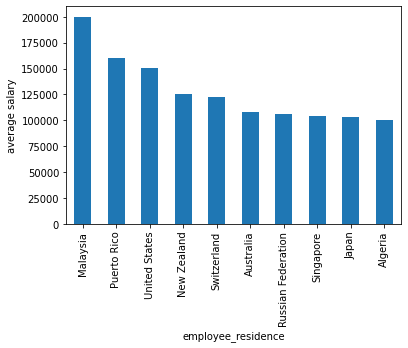

In [56]:
top_10_employee_residence.plot(kind="bar")
plt.ylabel("average salary")
plt.show()

## Model Building and Prediction

In [57]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [58]:
df2.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,job_type,company_location,company_size
0,2020,Mid,Full_Time,Data Scientist,79833,Germany,onsite,Germany,Large
1,2020,Senior,Full_Time,Machine Learning Scientist,260000,Japan,onsite,Japan,Small
2,2020,Senior,Full_Time,Big Data Engineer,109024,United Kingdom,hybrid,United Kingdom,Medium
3,2020,Mid,Full_Time,Product Data Analyst,20000,Honduras,onsite,Honduras,Small
4,2020,Senior,Full_Time,Machine Learning Engineer,150000,United States,hybrid,United States,Large


In [59]:
df3 = df2.copy()
df3

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,job_type,company_location,company_size
0,2020,Mid,Full_Time,Data Scientist,79833,Germany,onsite,Germany,Large
1,2020,Senior,Full_Time,Machine Learning Scientist,260000,Japan,onsite,Japan,Small
2,2020,Senior,Full_Time,Big Data Engineer,109024,United Kingdom,hybrid,United Kingdom,Medium
3,2020,Mid,Full_Time,Product Data Analyst,20000,Honduras,onsite,Honduras,Small
4,2020,Senior,Full_Time,Machine Learning Engineer,150000,United States,hybrid,United States,Large
...,...,...,...,...,...,...,...,...,...
602,2022,Senior,Full_Time,Data Engineer,154000,United States,remote,United States,Medium
603,2022,Senior,Full_Time,Data Engineer,126000,United States,remote,United States,Medium
604,2022,Senior,Full_Time,Data Analyst,129000,United States,onsite,United States,Medium
605,2022,Senior,Full_Time,Data Analyst,150000,United States,remote,United States,Medium


In [60]:
df3.drop(['employee_residence','company_location','work_year'],axis=1,inplace=True)
df3

,experience_level,employment_type,job_title,salary_in_usd,job_type,company_size
0,Mid,Full_Time,Data Scientist,79833,onsite,Large
1,Senior,Full_Time,Machine Learning Scientist,260000,onsite,Small
2,Senior,Full_Time,Big Data Engineer,109024,hybrid,Medium
3,Mid,Full_Time,Product Data Analyst,20000,onsite,Small
4,Senior,Full_Time,Machine Learning Engineer,150000,hybrid,Large
...,...,...,...,...,...,...
602,Senior,Full_Time,Data Engineer,154000,remote,Medium
603,Senior,Full_Time,Data Engineer,126000,remote,Medium
604,Senior,Full_Time,Data Analyst,129000,onsite,Medium
605,Senior,Full_Time,Data Analyst,150000,remote,Medium


In [61]:
def grouping_jobs(x):
    if(x.find("Data Science")>=0 or x.find("Data Scientist")>=0):
        df3['job_title'].replace(x, 'Data Scientist',inplace=True)
        
    elif(x.find("Analyst")>=0 or x.find("Analytics")>=0):
        df3['job_title'].replace(x,'Data Analyst',inplace=True)
        
    elif(x.find("ML")>=0 or x.find("Machine Learning")>=0):
        df3['job_title'].replace(x,'Machine Learning Engineer',inplace=True)
        
    elif(x.find("Data Engineer")>=0 or x.find("Data Engineering")>=0):
        df3['job_title'].replace(x,'Data Engineer',inplace=True)
    else:
        df3['job_title'].replace(x,'AI related',inplace=True)

In [62]:
for i in df3['job_title']:
    grouping_jobs(i)
print(df3['job_title'].value_counts())

Data Scientist               179
Data Engineer                147
Data Analyst                 120
Machine Learning Engineer     66
AI related                    53
Name: job_title, dtype: int64


In [63]:
categorical_data = df3.select_dtypes(include='object').columns
categorical_data

Index(['experience_level', 'employment_type', 'job_title', 'job_type',
       'company_size'],
      dtype='object')

In [64]:
df4 = pd.get_dummies(df3,columns=categorical_data)
df4

,salary_in_usd,experience_level_Entry,experience_level_Executive,experience_level_Mid,experience_level_Senior,employment_type_Contract,employment_type_Freelance,employment_type_Full_Time,employment_type_Part_Time,job_title_AI related,job_title_Data Analyst,job_title_Data Engineer,job_title_Data Scientist,job_title_Machine Learning Engineer,job_type_hybrid,job_type_onsite,job_type_remote,company_size_Large,company_size_Medium,company_size_Small
0,79833,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0
1,260000,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1
2,109024,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,20000,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
4,150000,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,154000,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
603,126000,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
604,129000,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
605,150000,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0


In [65]:
df4.columns

Index(['salary_in_usd', 'experience_level_Entry', 'experience_level_Executive',
       'experience_level_Mid', 'experience_level_Senior',
       'employment_type_Contract', 'employment_type_Freelance',
       'employment_type_Full_Time', 'employment_type_Part_Time',
       'job_title_AI related', 'job_title_Data Analyst',
       'job_title_Data Engineer', 'job_title_Data Scientist',
       'job_title_Machine Learning Engineer', 'job_type_hybrid',
       'job_type_onsite', 'job_type_remote', 'company_size_Large',
       'company_size_Medium', 'company_size_Small'],
      dtype='object')

In [66]:
X = df4.drop('salary_in_usd',axis=1)
y = df4['salary_in_usd']

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [68]:
print(f'shape of training X : {X_train.shape}')
print(f'shape of testing X : {X_test.shape}')

shape of training X : (452, 19)
shape of testing X : (113, 19)


In [69]:
X.dtypes

experience_level_Entry                 uint8
experience_level_Executive             uint8
experience_level_Mid                   uint8
experience_level_Senior                uint8
employment_type_Contract               uint8
employment_type_Freelance              uint8
employment_type_Full_Time              uint8
employment_type_Part_Time              uint8
job_title_AI related                   uint8
job_title_Data Analyst                 uint8
job_title_Data Engineer                uint8
job_title_Data Scientist               uint8
job_title_Machine Learning Engineer    uint8
job_type_hybrid                        uint8
job_type_onsite                        uint8
job_type_remote                        uint8
company_size_Large                     uint8
company_size_Medium                    uint8
company_size_Small                     uint8
dtype: object

In [70]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()

In [71]:
y_pred = linear_reg.predict(X_test)

In [72]:
print(f'R2 Score: {metrics.r2_score(y_test,y_pred)}')

R2 Score: 0.26109792273085297


In [73]:
#


In [74]:
df3.head()

,experience_level,employment_type,job_title,salary_in_usd,job_type,company_size
0,Mid,Full_Time,Data Scientist,79833,onsite,Large
1,Senior,Full_Time,Machine Learning Engineer,260000,onsite,Small
2,Senior,Full_Time,Data Engineer,109024,hybrid,Medium
3,Mid,Full_Time,Data Analyst,20000,onsite,Small
4,Senior,Full_Time,Machine Learning Engineer,150000,hybrid,Large


In [77]:
df5 = df3.copy()
df5.head()

,experience_level,employment_type,job_title,salary_in_usd,job_type,company_size
0,Mid,Full_Time,Data Scientist,79833,onsite,Large
1,Senior,Full_Time,Machine Learning Engineer,260000,onsite,Small
2,Senior,Full_Time,Data Engineer,109024,hybrid,Medium
3,Mid,Full_Time,Data Analyst,20000,onsite,Small
4,Senior,Full_Time,Machine Learning Engineer,150000,hybrid,Large


In [76]:
categorical_data

Index(['experience_level', 'employment_type', 'job_title', 'job_type',
       'company_size'],
      dtype='object')

In [101]:
from sklearn.preprocessing import LabelEncoder

In [102]:
label_encoder = LabelEncoder()

for col in categorical_data:
    df5[col] = label_encoder.fit_transform(df5[col])
    

In [103]:
df5.head()

,experience_level,employment_type,job_title,salary_in_usd,job_type,company_size
0,2,2,3,79833,1,0
1,3,2,4,260000,1,2
2,3,2,2,109024,0,1
3,2,2,1,20000,1,2
4,3,2,4,150000,0,0


In [112]:
X = df5.drop(['salary_in_usd'],axis=1)
# y = df5.salary_in_usd.apply(np.log10)
y = df5.salary_in_usd


In [113]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [114]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test,y_test)
accuracy

0.03742248188463182